---
title: "Finding Minimas and Maximas using SciPy"
author: "Kirtan Gangani"
date: "July 14, 2025" 
categories: [Python, SciPy, Data Visualisation]
format:
  html:
    toc: true
    code-fold: false
    code-copy: true
jupyter: python3
---

# Introduction

Identifying maxima and minima is a fundamental task if you are analyzing sensor readings, optimizing a machine learning model, or studying scientific phenomena. Fortunately, Python's SciPy library provides an efficient way to do that.

In this blog post, we'll dive into how to use SciPy for finding both local and global extrema (maximas and minimas) in your data and functions.

# Understanding Maximas and Minimas

207
207


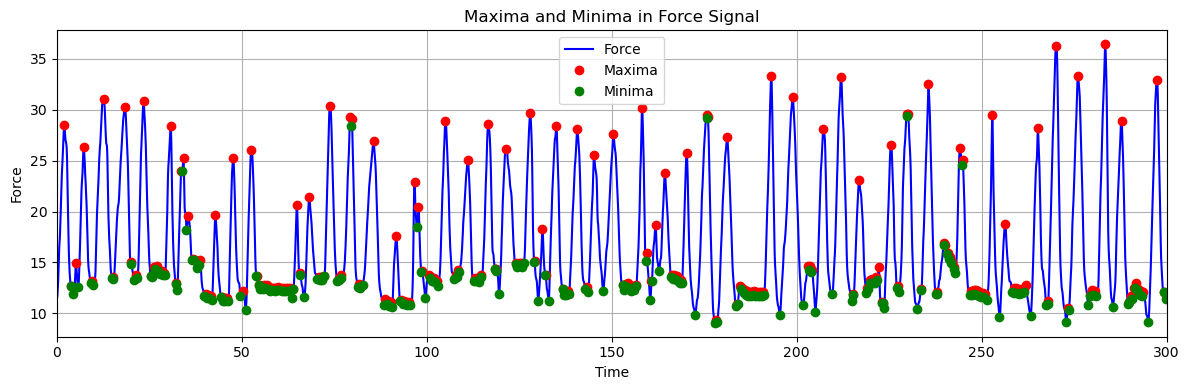

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pd.read_csv(r'datasets/chest-belt.csv')

force = df['Force(N)'].values
time = df['Time(s)'].values

peaks, _ = find_peaks(force)

valleys, _ = find_peaks(-force)

plt.figure(figsize=(12, 4))
plt.plot(time, force, label='Force', color='blue')
plt.plot(time[peaks], force[peaks], "ro", label='Maxima')
plt.plot(time[valleys], force[valleys], "go", label='Minima')
plt.title('Maxima and Minima in Force Signal')
plt.xlabel('Time')
plt.xlim(0, 300)
plt.ylabel('Force')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


48
48


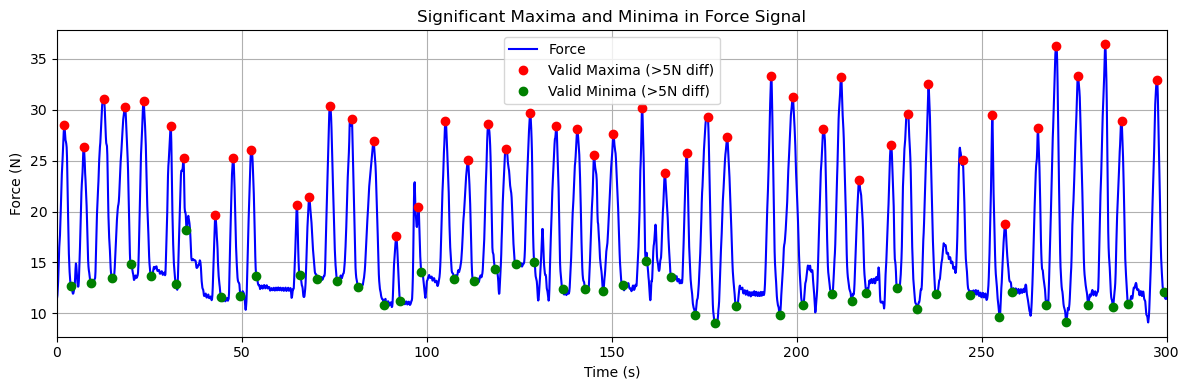

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pd.read_csv(r'datasets/chest-belt.csv')

force = df['Force(N)'].values
time = df['Time(s)'].values

peaks, _ = find_peaks(force)
valleys, _ = find_peaks(-force)

valid_peaks = []
valid_valleys = []

for peak in peaks:
    future_valleys = [v for v in valleys if v > peak]
    if not future_valleys:
        continue

    next_valley = future_valleys[0] 
    force_diff = force[peak] - force[next_valley]

    if force_diff > 5:
        valid_peaks.append(peak)
        valid_valleys.append(next_valley)

plt.figure(figsize=(12, 4))
plt.plot(time, force, label='Force', color='blue')
plt.plot(time[valid_peaks], force[valid_peaks], "ro", label='Valid Maxima (>5N diff)')
plt.plot(time[valid_valleys], force[valid_valleys], "go", label='Valid Minima (>5N diff)')
plt.title('Significant Maxima and Minima in Force Signal')
plt.xlabel('Time (s)')
plt.xlim(0, 300)
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'datasets/chest-belt.csv')

force = df['Force(N)'].values
time = df['Time(s)'].values

maxima = []
minima = []
for i, j in enumerate(force):
    if i == 0 or i == len(force)-1:
        continue
    if j >= force[i-1] and j > force[i+1]:
        maxima.append(j)
print(len(maxima))

for i, j in enumerate(force):
    if i == 0 or i == len(force)-1:
        continue
    if j <= force[i-1] and j < force[i+1]:
        minima.append(j)
print(len(minima))



208
207
